# The Trump Mind Map

The goal of this project is to visualize former President Trump's Tweets, and highlight patterns.

## Initializations

In [3]:
FILEPATH = 'Data/tweets_01-08-2021.csv'

## Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

## Data Loading

In [5]:
TrumpTweets_df = pd.read_csv(FILEPATH) # Master Dataframe. Us df = tweets_df to initialize df

#Clean tweets_df dataFrame: convert date to pd.datetime and sort by date
def clean_df(df):
    df["date"] = pd.to_datetime(df['date'])
    df = df.sort_values(by = 'date')
    return df

# Modify tweets_df
def modify_df(df):
    df['date'] = df['date'] - pd.Timedelta('4h') # Convert Date values to EST Time
    df['isRetweet'] = df['isRetweet'].apply(lambda x: True if x == 't' else False) # Convert isRetweet to boolean
    df['day'] = df['date'].apply(lambda x: x.date()) # Create Day column
    df['time'] = df['date'].apply(lambda x: pd.Timestamp.time(x)) # Create Time column
    return df

TrumpTweets_df = TrumpTweets_df.pipe(clean_df).pipe(modify_df) # Clean data frame

## Visualizations

### Scatterplot - Tweets Date vs. Time

In [6]:
start_date = '2016/01/01'
end_date = '2021/01/20'

df = TrumpTweets_df[TrumpTweets_df['date'].between(start_date, end_date)]

Text(0.5, 1.0, "The 'Fake' President")

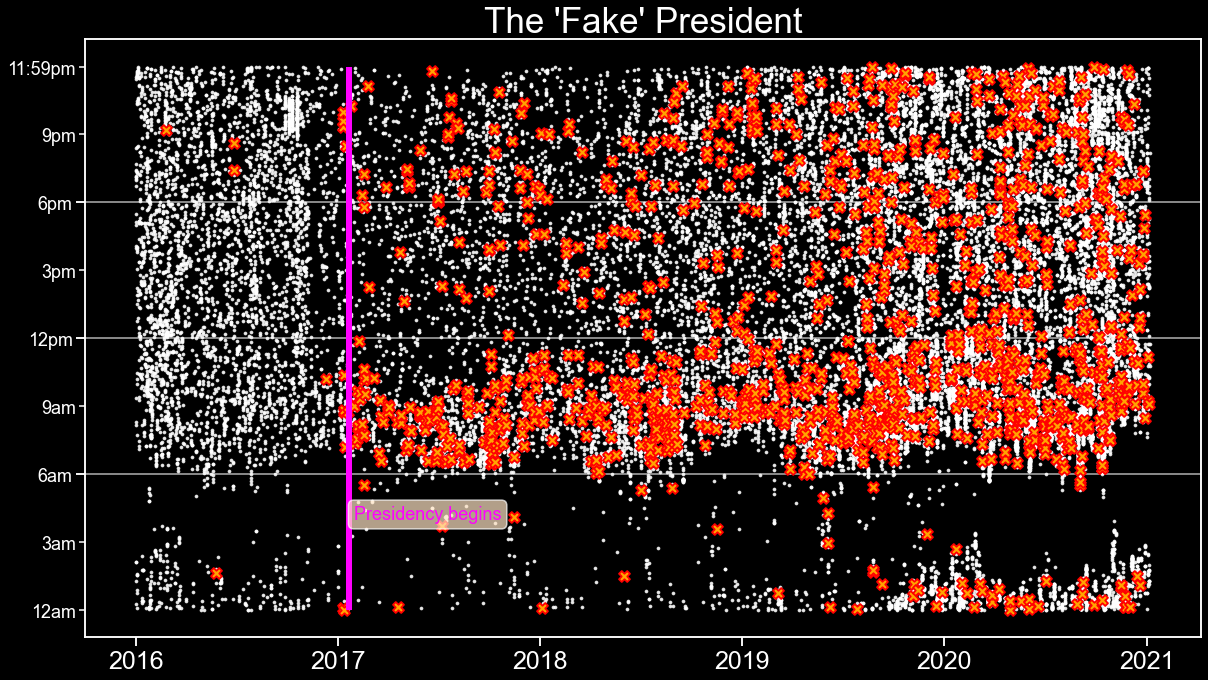

In [23]:
mark_word = "fake"

fig, ax =  plt.subplots(figsize=(20,11)) # Set global matplotlib figure size variables

# Plot base Tweets

def plot_tweets(df, ax=None, **plt_kwargs):
    '''Scatter plot of Tweets with date values on x-axis and time values on y-axis (represented as number of second integers)
    plt_kwargs recommended for base Tweets: s=20, marker='.', c=white, alpha=0.8
    plt_kwargs for marked Tweets: s=120, marker='X', edgecolors='red', linewidths = 1.8, c=orange, alpha=1'''
    if ax is None:
        ax = plt.gca()
    x = df['date'].apply(lambda d: d.date()) # Plot date value on x-axis
    y = df['date'].dt.hour*3600+df['date'].dt.minute*60 + df['date'].dt.second # Plot time value on y-axis as integer
    ax.scatter(x, y, **plt_kwargs) ## example plot here
    return(ax)

# Base Tweets marked in white

plot_tweets(df, ax,
           s = 20,
           marker = '.',
           c = 'white',
           alpha = 0.8)

# Plot Tweets containing mark_word over top base map

sub_df = df[df['text'].str.contains(mark_word,case=False)] # Select Tweets containing mark_word

plot_tweets(sub_df, ax,
            s = 120,
            marker = 'X',
            edgecolors='red',
            linewidths=1.8,
            c = 'orange',
            alpha=1)

def mark_datetime (label, date, time_int, ax=None, text_offset=5, **kwargs):
    '''Draw vertical line on dates of interest. Takes string label, datetime object, time represented as integer seconds, position of text offset from data (default 5) and ax'''
    if ax is None:
        ax = plt.gca()
    ax.vlines(date,0,3600*24,colors='magenta',linewidth=6)
    ax.annotate(label,xy=(date,time_int),xycoords='data',
                bbox=dict(boxstyle="round",
                          fc='bisque',
                          alpha=0.7,
                          #ec=color_pal[6]
                         ),
                xytext=(text_offset,0) ,textcoords = 'offset points', color='magenta')

mark_datetime("Presidency begins", dt.datetime(2017,1,20), 4*3600, ax)

# Set major/minor ticks

def set_ticks (ax):
    if ax is None:
        ax = plt.gca()
    tick_major = 3600*np.array([6,12,18])
    tick_major_label = ['6am', '12pm', '6pm']
    tick_minor = 3600*np.array([0,3,9,15,21,24-60/3600])
    tick_minor_label = ['12am', '3am', '9am', '3pm', '9pm', '11:59pm']

    ax.set_yticks(tick_major)
    ax.set_yticklabels(tick_major_label, fontdict={'fontsize':18})
    ax.set_yticks(tick_minor,minor=True)
    ax.set_yticklabels(tick_minor_label,minor=True, fontdict={'fontsize':18})
    plt.grid(b=True, which='major', axis='y', color='white',alpha=0.7)
    plt.xticks(fontsize=25)
    return (ax)
set_ticks(ax)
ax.set_title("The 'Fake' President", fontdict={'fontsize':35})


Text(0.5, 1.0, "Everything is 'Rigged!'")

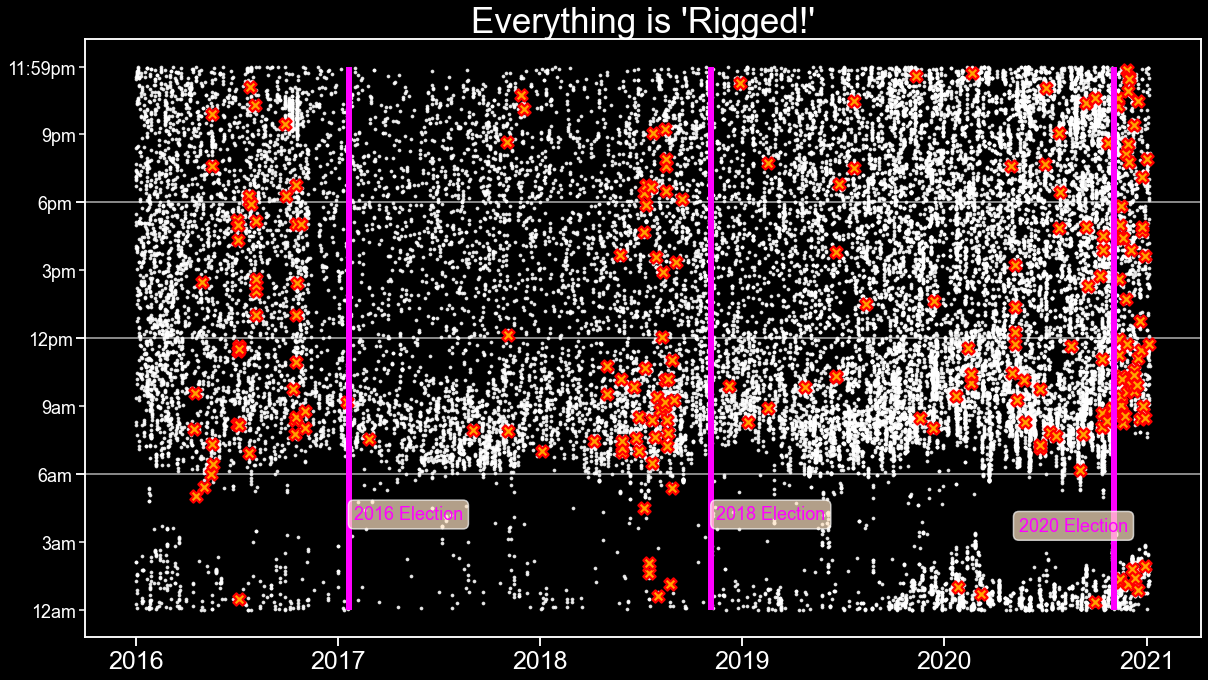

In [24]:
mark_word = "rigged"

fig, ax =  plt.subplots(figsize=(20,11)) # Set global matplotlib figure size variables

plot_tweets(df, ax,
           s = 20,
           marker = '.',
           c = 'white',
           alpha = 0.8)

sub_df = df[df['text'].str.contains(mark_word,case=False)] # Select Tweets containing mark_word

plot_tweets(sub_df, ax,
            s = 150,
            marker = 'X',
            edgecolors='red',
            linewidths=2.2,
            c = 'orange',
            alpha=1)

mark_datetime("2016 Election", dt.datetime(2017,1,20), 4*3600, ax)
mark_datetime("2018 Election", dt.datetime(2018,11,6), 4*3600, ax)
mark_datetime("2020 Election", dt.datetime(2020,11,3), 3.5*3600, ax, text_offset = -95)

set_ticks(ax)

ax.set_title("Everything is 'Rigged!'", fontdict={'fontsize':35})